In [57]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import re

%matplotlib inline

pd.set_option('max_columns', 60)

In [58]:
#load dataset
df = pd.read_csv('chiefs_data2019.csv')

#only home games
df = df[df['game_location'] == 'home']

del[
    df['playoff_game'],
    df['game_location']
    
]

#get rid of byes

df = df[df['attendance'] != 'Bye']


df.shape

(120, 25)

In [59]:
df.head()

,season,week,game_day_of_week,game_date,game_time,game_outcome,overtime,team_record,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance
0,2005,1,Sun,September 11,1:00PM ET,W,NaN,1-0,New York Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.04,"78,014"
3,2005,4,Sun,October 2,4:15PM ET,L,NaN,2-2,Philadelphia Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-8.01,11.24,"78,742"
5,2005,6,Sun,October 16,1:00PM ET,W,NaN,3-2,Washington Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,7.00,1.85,-1.73,"78,083"
8,2005,9,Sun,November 6,1:00PM ET,W,NaN,5-3,Oakland Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,3.23,-1.08,"79,033"
11,2005,12,Sun,November 27,1:00PM ET,W,NaN,7-4,New England Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,1.60,-3.27,"78,025"


In [60]:
df['attendance'] = df['attendance'].str.replace(',','')

df['attendance'] = df['attendance'].astype('int')

<AxesSubplot:>

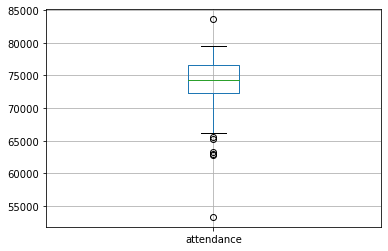

In [61]:
df.boxplot('attendance')

In [62]:
#this game was at Welbly Stadium so we are going to throw it out

df[df['attendance'] >= 80000]

,season,week,game_day_of_week,game_date,game_time,game_outcome,overtime,team_record,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance
177,2015,8,Sun,November 1,9:36AM ET,W,NaN,3-5,Detroit Lions,45.0,10.0,24.0,340.0,134.0,206.0,NaN,16.0,276.0,195.0,81.0,2.0,21.11,10.04,4.13,83624


In [63]:
df = df[df['attendance'] < 80000].reset_index()

try:
  del[df['index']]
except:
  pass
df.shape

(119, 25)

In [64]:
try:
  del[df['Unnamed: 0']]
except:
  print('unnamed does not exist')
  pass

unnamed does not exist


In [65]:
dummy = pd.get_dummies(df['game_day_of_week'], prefix = 'game_day')

dummy = dummy[['game_day_Sun','game_day_Mon']]

#attach day of week to dataset

df = pd.concat([df,dummy],axis = 1)

del[df['game_day_of_week']]


In [66]:
df.head()

,season,week,game_date,game_time,game_outcome,overtime,team_record,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon
0,2005,1,September 11,1:00PM ET,W,NaN,1-0,New York Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.04,78014,1,0
1,2005,4,October 2,4:15PM ET,L,NaN,2-2,Philadelphia Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-8.01,11.24,78742,1,0
2,2005,6,October 16,1:00PM ET,W,NaN,3-2,Washington Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,7.00,1.85,-1.73,78083,1,0
3,2005,9,November 6,1:00PM ET,W,NaN,5-3,Oakland Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,3.23,-1.08,79033,1,0
4,2005,12,November 27,1:00PM ET,W,NaN,7-4,New England Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,1.60,-3.27,78025,1,0


In [67]:
pd.DataFrame(df.groupby(['game_day_Sun','game_day_Mon'])['attendance'].mean()).reset_index()

,game_day_Sun,game_day_Mon,attendance
0,0,0,75420.000000
1,0,1,74360.600000
2,1,0,73421.691589


In [68]:
df.game_time.value_counts()

1:00PM ET     53
1:03PM ET     24
1:02PM ET     10
4:26PM ET      4
8:20PM ET      4
8:30PM ET      3
1:04PM ET      3
4:25PM ET      3
4:15PM ET      2
8:25PM ET      2
8:31PM ET      2
10:20PM ET     1
1:06PM ET      1
8:29PM ET      1
1:08PM ET      1
4:06PM ET      1
8:12PM ET      1
8:32PM ET      1
8:40PM ET      1
1:05PM ET      1
Name: game_time, dtype: int64

In [69]:
#consolidate the times 

aa = [] 

for x in df['game_time']:
  aa.append(re.match(r'^[0-9]+', x)[0])

df['game_time'] = aa

In [70]:
df.game_time.value_counts()

1     93
8     15
4     10
10     1
Name: game_time, dtype: int64

In [71]:
df.head()

,season,week,game_date,game_time,game_outcome,overtime,team_record,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon
0,2005,1,September 11,1,W,NaN,1-0,New York Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.04,78014,1,0
1,2005,4,October 2,4,L,NaN,2-2,Philadelphia Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-8.01,11.24,78742,1,0
2,2005,6,October 16,1,W,NaN,3-2,Washington Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,7.00,1.85,-1.73,78083,1,0
3,2005,9,November 6,1,W,NaN,5-3,Oakland Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,3.23,-1.08,79033,1,0
4,2005,12,November 27,1,W,NaN,7-4,New England Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,1.60,-3.27,78025,1,0


In [72]:
#split up wins and losses

wins = []
loss = []

for x in df['team_record']:
  wl = x.split('-')
  wins.append(wl[0])
  loss.append(wl[1])
  
df['wins'] = wins
df['losses'] = loss

In [73]:
df.head()

,season,week,game_date,game_time,game_outcome,overtime,team_record,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses
0,2005,1,September 11,1,W,NaN,1-0,New York Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.04,78014,1,0,1,0
1,2005,4,October 2,4,L,NaN,2-2,Philadelphia Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-8.01,11.24,78742,1,0,2,2
2,2005,6,October 16,1,W,NaN,3-2,Washington Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,7.00,1.85,-1.73,78083,1,0,3,2
3,2005,9,November 6,1,W,NaN,5-3,Oakland Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,3.23,-1.08,79033,1,0,5,3
4,2005,12,November 27,1,W,NaN,7-4,New England Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,1.60,-3.27,78025,1,0,7,4


<AxesSubplot:>

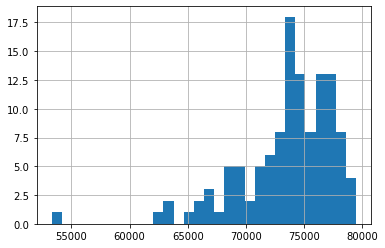

In [74]:
df['attendance'].hist(bins = 30)

In [75]:
df.head()

,season,week,game_date,game_time,game_outcome,overtime,team_record,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses
0,2005,1,September 11,1,W,NaN,1-0,New York Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.04,78014,1,0,1,0
1,2005,4,October 2,4,L,NaN,2-2,Philadelphia Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-8.01,11.24,78742,1,0,2,2
2,2005,6,October 16,1,W,NaN,3-2,Washington Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,7.00,1.85,-1.73,78083,1,0,3,2
3,2005,9,November 6,1,W,NaN,5-3,Oakland Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,3.23,-1.08,79033,1,0,5,3
4,2005,12,November 27,1,W,NaN,7-4,New England Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,1.60,-3.27,78025,1,0,7,4


In [76]:
#hotcode Overtime
aa = []

for x in df.overtime:
  if x == 'OT':
    aa.append(1)
  else:
    aa.append(0)
df['overtime'] = aa

In [77]:
#win / loss ratio
df['wins'] = df['wins'].astype('int')
df['losses'] = df['losses'].astype('int')
df['win_ratio'] = df['wins'] / (df['wins'] + df['losses'])

In [78]:
df.head()

,season,week,game_date,game_time,game_outcome,overtime,team_record,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses,win_ratio
0,2005,1,September 11,1,W,0,1-0,New York Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.04,78014,1,0,1,0,1.000000
1,2005,4,October 2,4,L,0,2-2,Philadelphia Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-8.01,11.24,78742,1,0,2,2,0.500000
2,2005,6,October 16,1,W,0,3-2,Washington Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,7.00,1.85,-1.73,78083,1,0,3,2,0.600000
3,2005,9,November 6,1,W,0,5-3,Oakland Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,3.23,-1.08,79033,1,0,5,3,0.625000
4,2005,12,November 27,1,W,0,7-4,New England Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,1.60,-3.27,78025,1,0,7,4,0.636364


<AxesSubplot:xlabel='win_ratio', ylabel='attendance'>

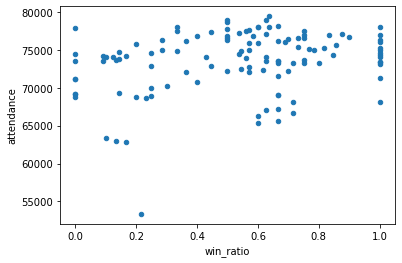

In [79]:
df.plot('win_ratio','attendance', kind = 'scatter')

In [80]:
df[['win_ratio','attendance']].corr()

,win_ratio,attendance
win_ratio,1.000000,0.268555
attendance,0.268555,1.000000


In [81]:
df.corr()

,season,week,overtime,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses,win_ratio
season,1.000000,0.026605,-0.029439,0.172195,-0.163228,0.095963,0.067548,0.238825,-0.194626,-0.223513,0.239733,0.076235,0.029792,0.061024,0.093684,0.239972,-0.077470,0.151723,-0.082615,-0.085740,0.088283,0.344684,-0.304002,0.446271
week,0.026605,1.000000,-0.022538,0.013740,-0.080155,0.048483,0.154487,0.045109,0.178592,-0.092133,-0.075795,-0.108491,-0.118262,0.011173,-0.063904,0.075426,0.056412,-0.073134,-0.154807,-0.011714,-0.188374,0.731848,0.683398,0.012891
overtime,-0.029439,-0.022538,1.000000,0.012313,0.050819,0.156689,0.116121,0.154875,-0.016329,-0.089426,0.148836,0.203442,0.200287,0.006799,0.073884,0.039679,-0.013985,-0.085908,-0.126322,-0.132984,0.111041,-0.070826,0.030229,-0.039452
pts_off,0.172195,0.013740,0.012313,1.000000,-0.065096,0.558052,0.588854,0.535444,0.228287,-0.234521,0.123198,0.006889,0.229376,-0.287363,0.350757,0.753249,0.126080,-0.030414,0.170887,-0.084032,0.135151,0.213802,-0.212953,0.401802
pts_def,-0.163228,-0.080155,0.050819,-0.065096,1.000000,-0.029515,-0.077080,0.025491,-0.148851,0.420598,0.497389,0.571664,0.293186,0.367446,-0.167787,-0.206808,-0.729458,-0.005884,-0.118049,0.102205,-0.059042,-0.303665,0.207614,-0.361716
first_down_off,0.095963,0.048483,0.156689,0.558052,-0.029515,1.000000,0.770768,0.618684,0.401093,-0.059421,-0.092113,-0.183548,0.060145,-0.317310,-0.009914,0.688777,-0.041965,-0.376288,0.063465,-0.039845,0.004310,0.164182,-0.109594,0.267258
yards_off,0.067548,0.154487,0.116121,0.588854,-0.077080,0.770768,1.000000,0.755591,0.578999,-0.104853,-0.140862,-0.203497,0.051590,-0.332297,0.079182,0.696589,0.078669,-0.456151,-0.094075,-0.023944,-0.012121,0.172968,0.047878,0.207010
pass_yds_off,0.238825,0.045109,0.154875,0.535444,0.025491,0.618684,0.755591,1.000000,-0.096590,-0.130242,0.060506,-0.016453,0.086424,-0.133138,0.137300,0.581868,-0.044912,-0.247762,0.060743,0.007676,-0.040036,0.159346,-0.094818,0.265776
rush_yds_off,-0.194626,0.178592,-0.016329,0.228287,-0.148851,0.401093,0.578999,-0.096590,1.000000,0.000970,-0.289348,-0.288730,-0.029182,-0.339202,-0.050594,0.334204,0.175438,-0.384723,-0.218551,-0.045936,0.031415,0.064484,0.190770,-0.016262
to_off,-0.223513,-0.092133,-0.089426,-0.234521,0.420598,-0.059421,-0.104853,-0.130242,0.000970,1.000000,-0.006917,0.061540,0.015730,0.060882,-0.155379,-0.480387,-0.107847,0.029119,-0.014850,-0.176143,0.120547,-0.287350,0.176221,-0.344579


In [82]:
df.head()

,season,week,game_date,game_time,game_outcome,overtime,team_record,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses,win_ratio
0,2005,1,September 11,1,W,0,1-0,New York Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.04,78014,1,0,1,0,1.000000
1,2005,4,October 2,4,L,0,2-2,Philadelphia Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-8.01,11.24,78742,1,0,2,2,0.500000
2,2005,6,October 16,1,W,0,3-2,Washington Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,7.00,1.85,-1.73,78083,1,0,3,2,0.600000
3,2005,9,November 6,1,W,0,5-3,Oakland Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,3.23,-1.08,79033,1,0,5,3,0.625000
4,2005,12,November 27,1,W,0,7-4,New England Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,1.60,-3.27,78025,1,0,7,4,0.636364


In [83]:
del[df['game_date']]

In [84]:
df.head()

,season,week,game_time,game_outcome,overtime,team_record,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses,win_ratio
0,2005,1,1,W,0,1-0,New York Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.04,78014,1,0,1,0,1.000000
1,2005,4,4,L,0,2-2,Philadelphia Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-8.01,11.24,78742,1,0,2,2,0.500000
2,2005,6,1,W,0,3-2,Washington Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,7.00,1.85,-1.73,78083,1,0,3,2,0.600000
3,2005,9,1,W,0,5-3,Oakland Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,3.23,-1.08,79033,1,0,5,3,0.625000
4,2005,12,1,W,0,7-4,New England Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,1.60,-3.27,78025,1,0,7,4,0.636364


In [85]:
#use only last word for opponent
#this will account for the St. Louis Rams
#movign to Los Angeles

aa = []

for x in df['opp']:
  word_splitter = x.split()
  aa.append(word_splitter[-1])
  
df['opp'] = aa

In [86]:
df.head()

,season,week,game_time,game_outcome,overtime,team_record,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses,win_ratio
0,2005,1,1,W,0,1-0,Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.04,78014,1,0,1,0,1.000000
1,2005,4,4,L,0,2-2,Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-8.01,11.24,78742,1,0,2,2,0.500000
2,2005,6,1,W,0,3-2,Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,7.00,1.85,-1.73,78083,1,0,3,2,0.600000
3,2005,9,1,W,0,5-3,Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,3.23,-1.08,79033,1,0,5,3,0.625000
4,2005,12,1,W,0,7-4,Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,1.60,-3.27,78025,1,0,7,4,0.636364


In [87]:
del[
    df['game_outcome'],
    df['overtime'],
    df['team_record']
]

In [88]:
df.head()

,season,week,game_time,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses,win_ratio
0,2005,1,1,Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.04,78014,1,0,1,0,1.000000
1,2005,4,4,Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-8.01,11.24,78742,1,0,2,2,0.500000
2,2005,6,1,Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,7.00,1.85,-1.73,78083,1,0,3,2,0.600000
3,2005,9,1,Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,3.23,-1.08,79033,1,0,5,3,0.625000
4,2005,12,1,Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,1.60,-3.27,78025,1,0,7,4,0.636364


In [89]:
df['game_time'].unique()

dummy = pd.get_dummies(df['game_time'], prefix = 'gametime')

df = pd.concat([df,dummy], axis = 1)

df.head()

,season,week,game_time,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses,win_ratio,gametime_1,gametime_10,gametime_4,gametime_8
0,2005,1,1,Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.04,78014,1,0,1,0,1.000000,1,0,0,0
1,2005,4,4,Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-8.01,11.24,78742,1,0,2,2,0.500000,0,0,1,0
2,2005,6,1,Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,7.00,1.85,-1.73,78083,1,0,3,2,0.600000,1,0,0,0
3,2005,9,1,Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,3.23,-1.08,79033,1,0,5,3,0.625000,1,0,0,0
4,2005,12,1,Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,1.60,-3.27,78025,1,0,7,4,0.636364,1,0,0,0


In [90]:
#dummy opponents. Might need to do feature reduction later:

dummy = pd.get_dummies(df['opp'],prefix = 'opp')

df = pd.concat([df, dummy], axis = 1)

del[df['opp']]

In [91]:
df.head()

,season,week,game_time,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses,win_ratio,gametime_1,gametime_10,gametime_4,gametime_8,opp_49ers,opp_Bears,opp_Bengals,opp_Bills,opp_Broncos,opp_Browns,opp_Buccaneers,opp_Cardinals,opp_Chargers,opp_Colts,opp_Cowboys,opp_Dolphins,opp_Eagles,opp_Falcons,opp_Giants,opp_Jaguars,opp_Jets,opp_Packers,opp_Panthers,opp_Patriots,opp_Raiders,opp_Rams,opp_Ravens,opp_Redskins,opp_Saints,opp_Seahawks,opp_Steelers,opp_Texans,opp_Titans,opp_Vikings
0,2005,1,1,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.04,78014,1,0,1,0,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2005,4,4,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-8.01,11.24,78742,1,0,2,2,0.500000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2005,6,1,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,7.00,1.85,-1.73,78083,1,0,3,2,0.600000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2005,9,1,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,3.23,-1.08,79033,1,0,5,3,0.625000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2005,12,1,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,1.60,-3.27,78025,1,0,7,4,0.636364,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [92]:
df.shape

(119, 58)

<AxesSubplot:>

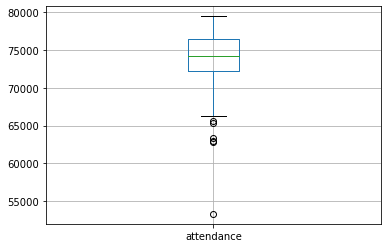

In [93]:
df.boxplot('attendance')

In [94]:
df.head()

,season,week,game_time,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses,win_ratio,gametime_1,gametime_10,gametime_4,gametime_8,opp_49ers,opp_Bears,opp_Bengals,opp_Bills,opp_Broncos,opp_Browns,opp_Buccaneers,opp_Cardinals,opp_Chargers,opp_Colts,opp_Cowboys,opp_Dolphins,opp_Eagles,opp_Falcons,opp_Giants,opp_Jaguars,opp_Jets,opp_Packers,opp_Panthers,opp_Patriots,opp_Raiders,opp_Rams,opp_Ravens,opp_Redskins,opp_Saints,opp_Seahawks,opp_Steelers,opp_Texans,opp_Titans,opp_Vikings
0,2005,1,1,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.04,78014,1,0,1,0,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2005,4,4,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-8.01,11.24,78742,1,0,2,2,0.500000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2005,6,1,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,7.00,1.85,-1.73,78083,1,0,3,2,0.600000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2005,9,1,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,3.23,-1.08,79033,1,0,5,3,0.625000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2005,12,1,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,1.60,-3.27,78025,1,0,7,4,0.636364,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [95]:
df.tail(10)

,season,week,game_time,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses,win_ratio,gametime_1,gametime_10,gametime_4,gametime_8,opp_49ers,opp_Bears,opp_Bengals,opp_Bills,opp_Broncos,opp_Browns,opp_Buccaneers,opp_Cardinals,opp_Chargers,opp_Colts,opp_Cowboys,opp_Dolphins,opp_Eagles,opp_Falcons,opp_Giants,opp_Jaguars,opp_Jets,opp_Packers,opp_Panthers,opp_Patriots,opp_Raiders,opp_Rams,opp_Ravens,opp_Redskins,opp_Saints,opp_Seahawks,opp_Steelers,opp_Texans,opp_Titans,opp_Vikings
109,2018,15,8,28.0,29.0,22.0,294.0,234.0,60.0,NaN,30.0,407.0,288.0,119.0,2.0,17.10,-21.67,4.16,75091,0,0,11,3,0.785714,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
110,2018,17,4,35.0,3.0,18.0,409.0,310.0,99.0,1.0,20.0,292.0,165.0,127.0,4.0,17.34,22.66,-9.26,77550,1,0,12,4,0.750000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
111,2019,3,1,33.0,28.0,27.0,503.0,363.0,140.0,NaN,29.0,452.0,249.0,203.0,NaN,25.98,-14.50,-4.79,73390,1,0,3,0,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
112,2019,5,8,13.0,19.0,18.0,324.0,288.0,36.0,1.0,25.0,331.0,151.0,180.0,1.0,-1.57,-4.31,-1.09,73352,1,0,4,1,0.800000,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
113,2019,6,1,24.0,31.0,20.0,309.0,256.0,53.0,2.0,35.0,472.0,280.0,192.0,3.0,6.10,-16.92,1.87,73323,1,0,4,2,0.666667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
114,2019,8,8,24.0,31.0,21.0,337.0,249.0,88.0,1.0,21.0,374.0,256.0,118.0,NaN,11.40,-17.67,0.68,73558,1,0,5,3,0.625000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
115,2019,9,1,26.0,23.0,17.0,377.0,230.0,147.0,1.0,17.0,308.0,212.0,96.0,NaN,7.56,-3.06,-0.23,73615,1,0,6,3,0.666667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
116,2019,13,4,40.0,9.0,22.0,259.0,163.0,96.0,NaN,19.0,332.0,210.0,122.0,3.0,14.17,3.44,11.19,73548,1,0,8,4,0.666667,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
117,2019,15,1,23.0,3.0,27.0,419.0,327.0,92.0,1.0,15.0,251.0,199.0,52.0,1.0,15.31,9.67,-4.87,73257,1,0,10,4,0.714286,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
118,2019,17,1,31.0,21.0,16.0,336.0,174.0,162.0,1.0,25.0,366.0,258.0,108.0,2.0,13.59,-9.18,7.29,73680,1,0,12,4,0.750000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [96]:
df.to_csv('chiefs_data_clean2019.csv',index = False)